<a href="https://colab.research.google.com/github/thanhbrandon/Song-Generator/blob/main/SongGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rush Song Generator
by Thanh Tran

Hello, this purpose of this program is generate Rush Songs using previous Rush Songs.

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
verses = [] # Create Verses String List

#filePath = '/content/drive/MyDrive/Rush Album Lyrics/Permanent Waves/Permanent Waves All Songs.txt' # Just Freewill
#filePath = '/content/drive/MyDrive/Rush Album Lyrics/All Lyrics.txt' # All lyrics
filePath = '/content/drive/MyDrive/Rush Album Lyrics/All Lyrics For Real.txt' # All lyrics
with open(filePath,encoding='cp1252') as f:
    for line in f:
      #line = line + "newline"
      verses.append(line)

tokenizer = Tokenizer() # Creates Tokenizer 
tokenizer.fit_on_texts(verses) # Converts words into numerical values
word_index = tokenizer.word_index
total_words = len(word_index) + 1

sequences = tokenizer.texts_to_sequences(verses) # Creates sequences using verses and tokenizer

padded = pad_sequences(sequences, padding='post') # Addes padding to sequences to make lengths consistent 

print(word_index)
print(sequences)
print(padded)

print(total_words)

{'the': 1, 'a': 2, 'to': 3, 'of': 4, 'and': 5, 'i': 6, 'in': 7, 'you': 8, 'is': 9, 'on': 10, 'we': 11, 'me': 12, 'my': 13, 'it': 14, 'that': 15, 'can': 16, 'for': 17, 'but': 18, 'all': 19, "it's": 20, 'with': 21, 'be': 22, 'world': 23, 'like': 24, 'just': 25, 'your': 26, 'out': 27, "don't": 28, "i'm": 29, 'what': 30, 'not': 31, 'are': 32, 'time': 33, 'so': 34, 'no': 35, 'at': 36, 'way': 37, 'they': 38, 'down': 39, 'get': 40, 'from': 41, 'or': 42, 'yeah': 43, 'will': 44, 'our': 45, 'one': 46, 'see': 47, 'love': 48, 'when': 49, 'as': 50, 'by': 51, 'this': 52, 'know': 53, 'some': 54, 'have': 55, 'if': 56, 'well': 57, 'now': 58, 'up': 59, 'too': 60, 'away': 61, 'day': 62, 'was': 63, 'feel': 64, 'heart': 65, 'night': 66, 'do': 67, 'their': 68, 'light': 69, 'more': 70, 'make': 71, 'got': 72, "can't": 73, 'us': 74, 'his': 75, 'still': 76, 'sometimes': 77, 'right': 78, 'look': 79, 'life': 80, 'go': 81, "we're": 82, 'back': 83, "you're": 84, 'eyes': 85, 'who': 86, 'around': 87, 'her': 88, 'turn

In [3]:

input_sequences = []
# Adds verses from file into list




for line in verses:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(verses[0])

Yeah, oh yeah!



In [4]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))



xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


696/696 [==============================] - 53s 68ms/step - loss: 6.4201 - accuracy: 0.1048
Epoch 2/100
696/696 [==============================] - 52s 74ms/step - loss: 5.2178 - accuracy: 0.1807
Epoch 3/100
696/696 [==============================] - 47s 68ms/step - loss: 4.2283 - accuracy: 0.2534
Epoch 4/100
696/696 [==============================] - 50s 72ms/step - loss: 3.4110 - accuracy: 0.3284
Epoch 5/100
696/696 [==============================] - 47s 68ms/step - loss: 2.8046 - accuracy: 0.4069
Epoch 6/100
696/696 [==============================] - 48s 69ms/step - loss: 2.3870 - accuracy: 0.4694
Epoch 7/100
696/696 [==============================] - 50s 72ms/step - loss: 2.0648 - accuracy: 0.5247
Epoch 8/100
696/696 [==============================] - 48s 69ms/step - loss: 1.8906 - accuracy: 0.5599
Epoch 9/100
696/696 [==============================] - 50s 72ms/step - loss: 1.7642 - accuracy: 0.5807
Epoch 10/100
696/696 [==============================] - 48s 68ms/step - loss: 2.1461 

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

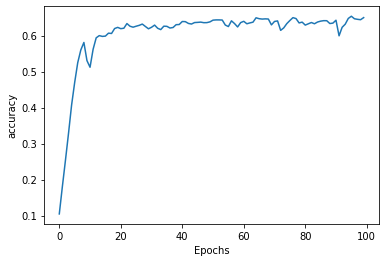

In [7]:
plot_graphs(history, 'accuracy')

In [10]:
#seed_text = "I've got a bad feeling about this"
seed_text = "In the constellation of Orion"
next_words = 1000
newline = 0
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
	newline = newline + 1;
	if (newline == 6):
		seed_text += "\n"
		newline = 0
print(seed_text)

In the constellation of Orion cygnus played his day now the
 lines of voices and oppression relaxing
 defeat roam proud how 'round the
 world train east before have easily
 news drive began yesterday that invisible
 load dreamed about what keeps go
 tumbling behind iron gates travels from
 first have can't again the acid
 rain amplified ' else and she
 had long ears above beyond make
 unknown direction ' right' level static
 charge upon defeat chose show resistance
 us on faith and weathered shore
 good beyond compare ignore ' power
 until unknown cargo closing prevail lighter
 roulette english voice every perfect game
 but i'll forms against again tower
 iron gates oppression caught but fade
 but too much strong and boys
 for debate about sun son gate
 above have easily love appears about
 what's going again in flames everyone
 moving eyes dawn is band reaction
 chaotica everyone everyone his eyes have
 lighted ago than never got us
 endure looks brighter than our past
 at other enoug